In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = df.sample(frac = 1)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8661,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21415,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10898,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20767,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9165,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train = df[:int(42000*0.7)]
df_test = df[int(42000*0.7):]

In [8]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8661,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21415,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10898,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33578,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33824,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25805,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37726,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train_y = pd.DataFrame(df_train["label"],columns = ["label"])
train_x = df_train.loc[:, df_train.columns!='label']
test_y = pd.DataFrame(df_test["label"],columns = ["label"])
test_x = df_test.loc[:, df_test.columns!='label']

In [11]:
train_y

,label
8661,2
21415,2
13984,0
10898,2
33578,1
...,...
33824,3
25805,5
12696,0
37726,1


In [24]:
test_x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
23012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20767,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
arr_train_x = train_x.to_numpy(dtype = float)
arr_train_y = train_y.to_numpy(dtype = float)
arr_test_x = test_x.to_numpy(dtype = float)
arr_test_y = test_y.to_numpy(dtype = float)

In [102]:
arr_test_y.type

AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [26]:
print("The shapes of arrays are as following: ")
print(f"Train set shape of X is : {arr_train_x.shape}")
print(f"Train set shape of Y is : {arr_train_y.shape}")
print(f"Test set shape of X is : {arr_test_x.shape}")
print(f"Test set shape of Y is : {arr_test_y.shape}")

The shapes of arrays are as following: 
Train set shape of X is : (29399, 784)
Train set shape of Y is : (29399, 1)
Test set shape of X is : (12601, 784)
Test set shape of Y is : (12601, 1)


In [27]:
x = arr_train_x[0].reshape(28,28)

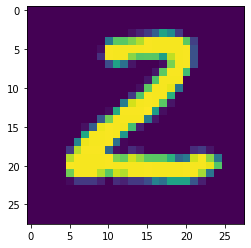

In [28]:
plt.imshow(x)

In [33]:
print("Normalization...")
arr_train_x /= 255.0
arr_test_x /= 255.0

Normalization...


In [104]:
print(np.sum(arr_test_x))

1295279.3411764707


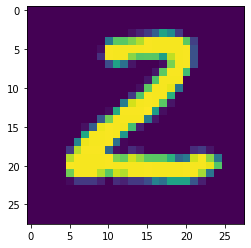

In [35]:
x = arr_train_x[0].reshape(28,28)
plt.imshow(x)

# TRAINING

In [36]:
def initializeParameters(shape):
    b = 0.0
    w = np.zeros([shape,1])
    return w,b

In [37]:
def softmax(Z):
    return np.exp( Z - np.max(Z) )/( np.sum( np.exp(Z - np.max(Z) )))

In [125]:
def derivativeSoftmax(softmax_Z):
    st_time = time.time()
    s = softmax_Z.reshape(-1,1)
    res = np.diagflat(s) - np.dot(s, s.T)
    print(f"Passed time for this op is {time.time() - st_time}")
    return res

In [123]:
def propagation(X,Y,W,b):
    
    m = Y.shape[1]
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)
    st_time = time.time()
    cost = -np.sum( derivativeSoftmax(Y_hat) ) / m
    print(f"Check for cost termination {time.time() - st_time}")
    
    dw = np.dot(X, (Y_hat - Y).T)/m
    db = np.sum(Y_hat - Y)/m
    
    costFormatted = np.squeeze(np.array(cost))
    
    return dw,db,costFormatted

In [105]:
def optimizeParameters(W,b,dw,db,l_rate=0.001, iteration = 100):
    
    W = copy.deepcopy(W)
    b = copy.deepcopy(b)
    
    for it in iteration:
        W = W - dw*l_rate
        b = b - db*l_rate
    
    return W,b

In [41]:
import time

In [118]:
def predict(X,W,b):
    startTime = time.time()
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)
    predictions = np.zeros([Y_hat.shape[0],1])
    
    for i in range(Y_hat.shape[0]):
        if Y_hat[0,i] < 0.5:
            predictions[0,i] = 0
        else:
            closest = 1000
            for i in range(1,10):
                if closest > np.abs(Y_hat[0,i] - i):
                    closest == np.abs(Y_hat[0,i] - i)
                predictions[0,i] = closest
    timePassed = startTime - time.time()
    print(f"Time required for this operation is {timePassed*10000000}")
    return predictions

In [119]:
def predict2(X,W,b):
    startTime = time.time()
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)
    predictions = np.zeros([1,X.shape[1]])
    
    for i in range(Y_hat.shape[0]):
        if Y_hat[0,i] < 0.5:
            predictions[0,i] = 0
        elif Y_hat[0,i] >= 0.5 and Y_hat < 1.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 1.5 and Y_hat < 2.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 2.5 and Y_hat < 3.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 3.5 and Y_hat < 4.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 4.5 and Y_hat < 5.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 5.5 and Y_hat < 6.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 6.5 and Y_hat < 7.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 7.5 and Y_hat < 8.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 8.5:
            predictions[0,i] = 1
            
    timePassed = startTime - time.time()
    print(f"Time required for this operation is {timePassed*10000000}")
    return predictions

In [120]:
def model(train_X,train_Y,test_X,test_Y,l_rate=0.001,iteration=10):
    
    W,b = initializeParameters(train_X.shape[0])    
    costHistory = []
    for i in range(iteration):
        dw,db,cost = propagation(train_X,train_Y,W,b)
        costHistory.append(cost)
        W = W - dw*l_rate
        b = b - db*l_rate
        print(f"Cost of {i}th op is {cost}")
    
    predictions = predict(train_X,W,b)
    predictions_test = predict(test_X,W,b)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions - train_Y)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction_test - test_Y)) * 100))
    
    return cost, predictions, predictions_test

In [121]:
print("The shapes of arrays are as following: ")
print(f"Train set shape of X is : {train_x.shape}")
print(f"Train set shape of Y is : {train_y.shape}")
print(f"Test set shape of X is : {test_x.shape}")
print(f"Test set shape of Y is : {test_y.shape}")

The shapes of arrays are as following: 
Train set shape of X is : (29399, 784)
Train set shape of Y is : (29399, 1)
Test set shape of X is : (12601, 784)
Test set shape of Y is : (12601, 1)


In [51]:
train_x.T.shape

(784, 29399)

In [126]:
model(arr_train_x.T, arr_train_y.T,arr_test_x.T, arr_test_y.T, l_rate=0.005, iteration = 100)

Passed time for this op is 46.50729775428772
Check for cost termination 53.41132640838623


KeyboardInterrupt: 